# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from statistics import median
import scipy.stats as st
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
 # Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    response = requests.get(city_url)
    response_json = response.json() 
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()['weather']
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response.json()['coord']['lat']
        city_lng = response.json()['coord']['lon']
        city_max_temp = (response.json()['main']['temp_max'] - 273.15)
        city_humidity = response.json()['main']['humidity']
        city_clouds = response.json()['clouds']['all']
        city_wind = response.json()['wind']['speed']
        city_country = response.json()['sys']['country']
        city_date = response.json()['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    #sleep timer may decrease likelihood of not found cities
    #comment out for faster data retrieval
    #time.sleep(1)
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | broome
Processing Record 3 of Set 1 | chatakonda
Processing Record 4 of Set 1 | omboue
Processing Record 5 of Set 1 | upington
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | lalomanu
City not found. Skipping...
Processing Record 8 of Set 1 | kavieng
Processing Record 9 of Set 1 | torbay
Processing Record 10 of Set 1 | wanning
Processing Record 11 of Set 1 | mwingi
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | beauceville
Processing Record 15 of Set 1 | northam
Processing Record 16 of Set 1 | asau
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 19 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 20 of Set 1 | alice springs
Processing Record 21 of Set 1 | rikitea
Proce

Processing Record 38 of Set 4 | biaora
Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | sur
Processing Record 41 of Set 4 | ambulu
Processing Record 42 of Set 4 | bang saphan
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | ukiah
Processing Record 45 of Set 4 | rocha
Processing Record 46 of Set 4 | taoudenni
Processing Record 47 of Set 4 | domoni
Processing Record 48 of Set 4 | yulara
Processing Record 49 of Set 4 | kampong thum
Processing Record 0 of Set 5 | mount isa
Processing Record 1 of Set 5 | junction city
Processing Record 2 of Set 5 | bandarbeyla
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | ust-tsilma
Processing Record 5 of Set 5 | marrakesh
Processing Record 6 of Set 5 | sterling
Processing Record 7 of Set 5 | wahpeton
Processing Record 8 of Set 5 | mattru
Processing Record 9 of Set 5 | zeya
Processing Record 10 of Set 5 | asht
City not found. Skipping...
Proces

Processing Record 23 of Set 8 | shingu
Processing Record 24 of Set 8 | millington
Processing Record 25 of Set 8 | dawson creek
Processing Record 26 of Set 8 | zlobin
Processing Record 27 of Set 8 | matadi
Processing Record 28 of Set 8 | labutta
City not found. Skipping...
Processing Record 29 of Set 8 | valdemarpils
Processing Record 30 of Set 8 | subang
Processing Record 31 of Set 8 | vakhrushev
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | hun
Processing Record 34 of Set 8 | souillac
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | hwange
Processing Record 37 of Set 8 | pacific grove
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | mulchen
Processing Record 40 of Set 8 | toccoa
Processing Record 41 of Set 8 | chumikan
Processing Record 42 of Set 8 | khani
Processing Record 43 of Set 8 | pokosnoye
Processing Record 44 of Set 8 | tekeli
Processing Record 45 of Set 8 | butaritari
Processing Record 46 of Set 8 |

Processing Record 10 of Set 12 | manacapuru
Processing Record 11 of Set 12 | khovu-aksy
Processing Record 12 of Set 12 | mantua
Processing Record 13 of Set 12 | konevo
Processing Record 14 of Set 12 | saint-augustin
Processing Record 15 of Set 12 | nekhayevskiy
Processing Record 16 of Set 12 | bargal
City not found. Skipping...
Processing Record 17 of Set 12 | fortuna
Processing Record 18 of Set 12 | teya
Processing Record 19 of Set 12 | kjollefjord
Processing Record 20 of Set 12 | boone
Processing Record 21 of Set 12 | san fernando
Processing Record 22 of Set 12 | namatanai
Processing Record 23 of Set 12 | wundanyi
Processing Record 24 of Set 12 | pemba
Processing Record 25 of Set 12 | olinda
Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | jining
Processing Record 28 of Set 12 | chiredzi
Processing Record 29 of Set 12 | chernyshevskiy
Processing Record 30 of Set 12 | cabedelo
Processing Record 31 of Set 12 | margate
Processing Record 32 of Set 12 | seoul
P

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [9]:
# Display sample data
city_data_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
541,sambava,-14.2667,50.1667,25.23,88,100,2.63,MG,1675698298
542,chapais,49.7834,-74.8492,-22.12,86,60,1.06,CA,1675698299
543,baley,51.6000,116.6333,-25.70,99,53,2.00,RU,1675698299
544,fukuma,33.7667,130.4667,7.38,91,100,2.58,JP,1675698299
545,copiapo,-27.3667,-70.3333,28.40,39,0,3.61,CL,1675698299


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,4.22,52,100,5.26,JP,1675698098
1,broome,42.2506,-75.8330,3.17,86,100,6.17,US,1675698098
2,chatakonda,17.5500,80.6500,24.23,34,15,1.01,IN,1675698099
3,omboue,-1.5746,9.2618,28.27,70,91,3.63,GA,1675698099
4,upington,-28.4478,21.2561,36.21,23,40,4.63,ZA,1675697994


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

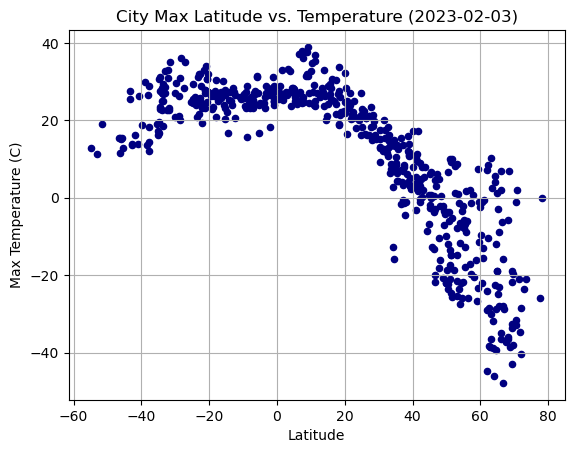

In [12]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp', c = 'navy')


# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-02-03)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

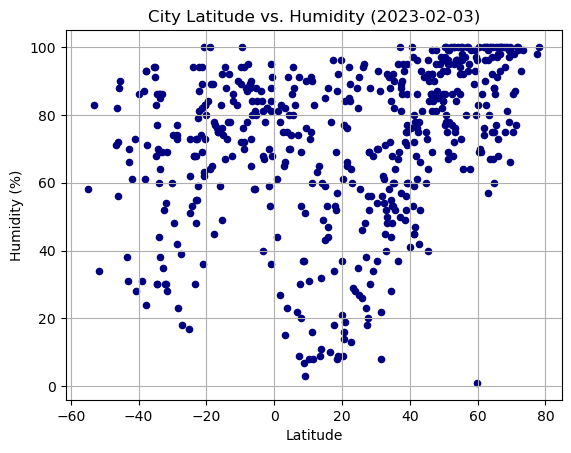

In [13]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

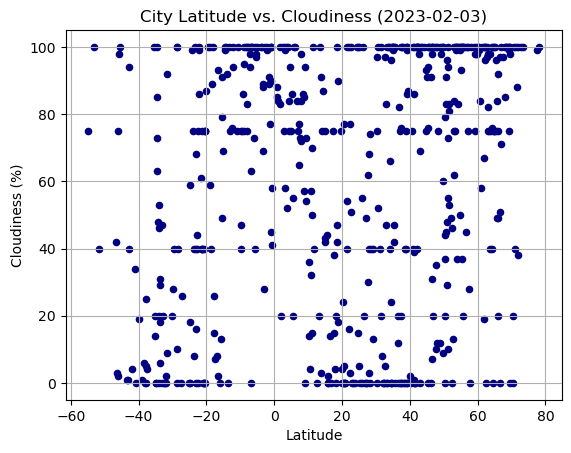

In [14]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat','Cloudiness', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

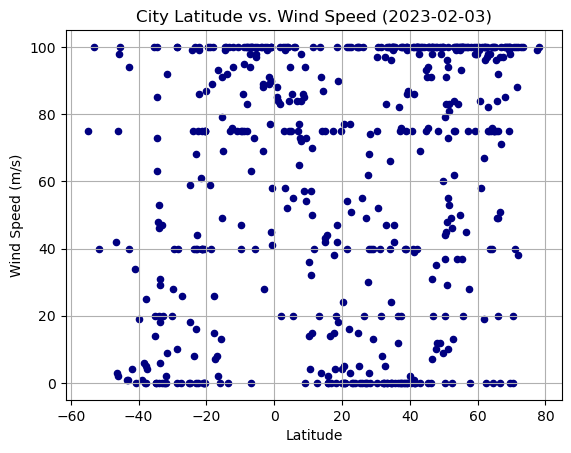

In [15]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat','Cloudiness', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, x_label, y_label):
    (m, b, r, p, se) = linregress(x, y)
    print(f"The r-value is {r**2}")
    regression = m * x + b
    corr_coef = round(st.pearsonr(x,y)[0],2)
    line = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.scatter(x,y)
    plt.plot(x,regression,"r-")
    plt.annotate(line,(5.8,0.8),fontsize=15,color="red")
    #plt.annotate(line, fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [58]:
###############################################################################
def linear_regression(x, y, x_label, y_label):
    (m, b, r, p, se) = linregress(x, y)
    print(f"The r-value is {r**2}")
    line_x = (median(x)-10)
    line_y = (max(y)-2.5)
    regression = m * x + b
    corr_coef = round(st.pearsonr(x,y)[0],2)
    line = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
    plt.scatter(x,y)
    plt.plot(x,regression,"r-")
    plt.annotate(line,(line_x,line_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [59]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hasaki,35.7333,140.8333,4.22,52,100,5.26,JP,1675698098
1,broome,42.2506,-75.8330,3.17,86,100,6.17,US,1675698098
2,chatakonda,17.5500,80.6500,24.23,34,15,1.01,IN,1675698099
5,severo-kurilsk,50.6789,156.1250,-3.80,78,91,6.41,RU,1675698099
7,torbay,47.6666,-52.7314,4.93,95,100,8.75,CA,1675698100


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,omboue,-1.5746,9.2618,28.27,70,91,3.63,GA,1675698099
4,upington,-28.4478,21.2561,36.21,23,40,4.63,ZA,1675697994
6,kavieng,-2.5744,150.7967,27.32,78,100,4.80,PG,1675698100
9,mwingi,-0.9344,38.0601,25.04,36,45,4.17,KE,1675698101
10,port alfred,-33.5906,26.8910,25.10,85,6,3.58,ZA,1675698101


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7607376881481306


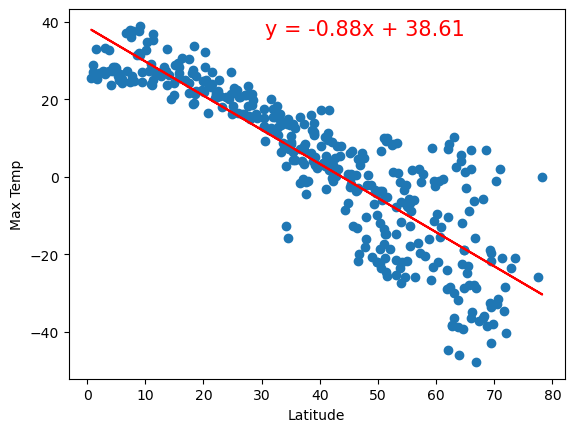

In [61]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],'Latitude','Max Temp')

The r-value is 0.13858758880228014


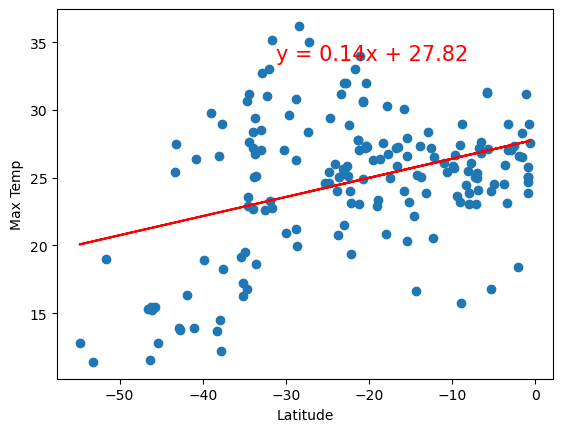

In [62]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],'Latitude','Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2846801424526976


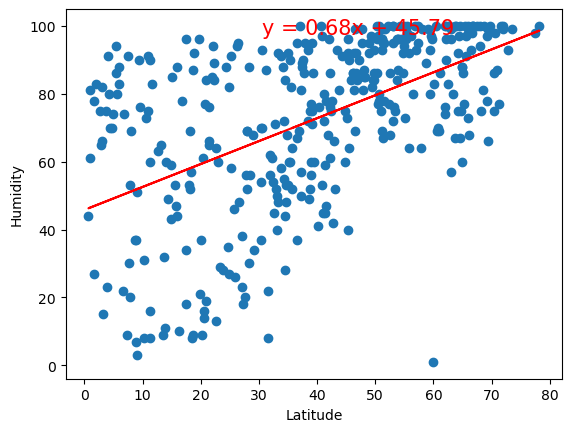

In [63]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],'Latitude','Humidity')

The r-value is 0.093376803201026


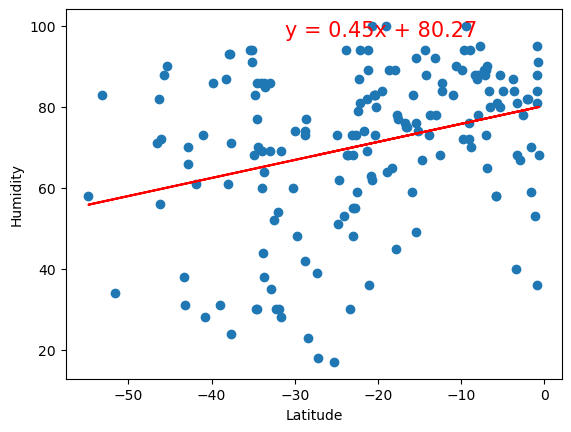

In [64]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],'Latitude','Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.05108340734434736


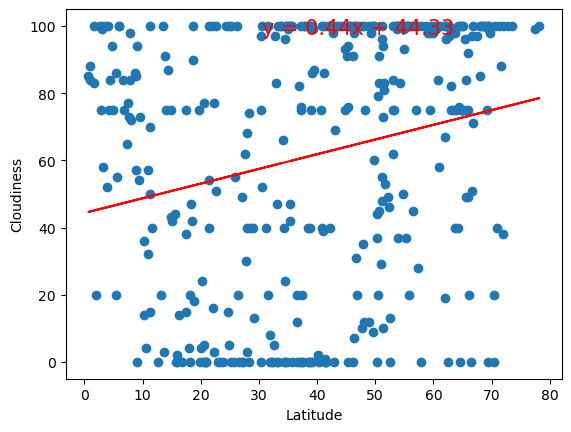

In [65]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r-value is 0.22151615788351767


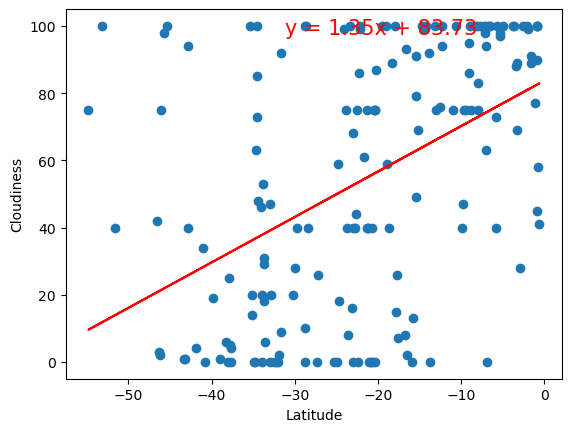

In [66]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0002048628046487888


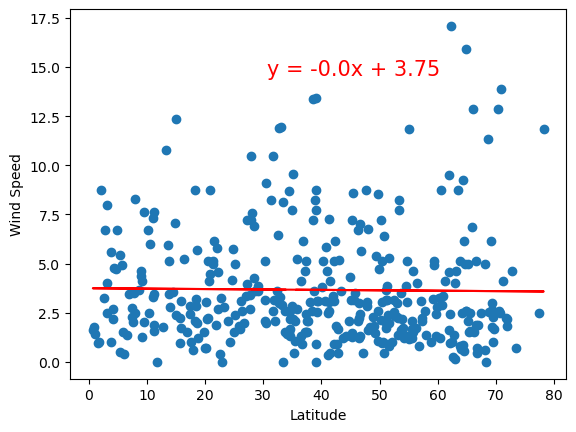

In [67]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r-value is 0.1031627344010377


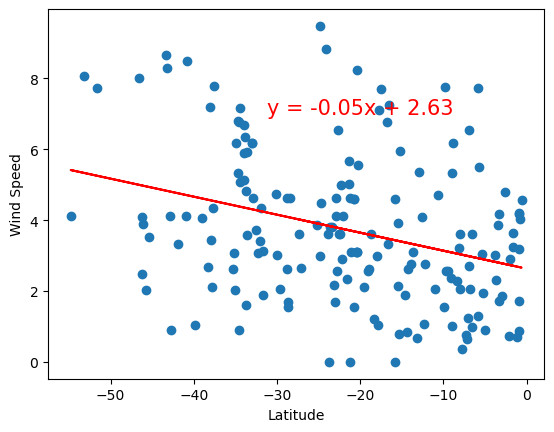

In [70]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE